# 自學矩陣的$LU$分解並將其應用於求行列式及解線性方程組

## 前情提要，請點下面的連結(兩個連結的內容皆相同)

## [LU分解學習紀錄連結1](https://nbviewer.org/github/maxjiang323/s/blob/main/LU%E5%88%86%E8%A7%A3%E5%AD%B8%E7%BF%92%E7%B4%80%E9%8C%84.ipynb)

## [LU分解學習紀錄連結2](https://github.com/maxjiang323/s/blob/main/LU%E5%88%86%E8%A7%A3%E5%AD%B8%E7%BF%92%E7%B4%80%E9%8C%84.ipynb)

### 在上面的筆記中，所有的程式碼我皆有測試過，只是當時僅用手寫的方式記錄下來。接下來，我要記錄我實作的部分，我會先寫下教授的程式碼，以及我第一、二次修改的程式碼，以幾個矩陣分別測試我和教授的程式碼的計算結果，並進行比較。

# 1. $LU$分解法

## (1)教授寫的程式碼(有的註解是我自己加的，方便我記錄及理解)

### [曾正男教授的LU分解教學影片連結](https://www.youtube.com/watch?v=W1elv5pS9xg)

In [152]:
import numpy as np

In [153]:
def LU_1(A):
    m, n = A.shape # array(matrix).shape 可以看array(matrix)的形狀 ; m-->rows ; n-->columns
    U = A.copy()
    L = np.mat(np.identity(m)) # L最初的型態為單位矩陣
    P = L.copy()
    
    for i in range(m):
        
        maxEc = abs(U[i, i])
        maxRow = i
        for k in range(i+1, m):
            if abs(U[k, i]) > maxEc:
                maxEc = U[k, i]
                maxRow = k
        # swap maximum row with current row
        # [rows, columns] ; 第 i 列與第 maxRow 列互換 
        # 從該列的第 i 行開始(省略前面從第 0 行到第 (i-1)行的互換 ∵ 都是 0, 不用互換)
        U[[i, maxRow], i:] = U[[maxRow, i], i:]
        # [rows, columns] ; L矩陣要整行都互換, 而 P矩陣也要整列都互換
        L[[i, maxRow], :] = L[[maxRow, i], :]
        P[:, [i, maxRow]] = P[:, [maxRow, i]]
        
        # gauss elimination 
        for t in range(i+1, m):
            c = -float(U[t, i])/U[i, i] # U[i, i]--> U矩陣對角線上的數值
            # delete row t by i
            U[t, i:] = U[t, i:] + c*U[i, i:] # 列運算
            # delete column i by t
            L[t:, i] = L[t:, i] - c*L[t:, t] # 行運算
    return L, U, P

## (2)我第一次修改後的程式碼

In [154]:
import numpy as np

In [155]:
def LU_2(A):
    m, n = A.shape
    U = np.array(A.copy())
    L = np.mat(np.identity(m))
    P = L.copy()
    
    for i in range(m):
         for t in range(i, m-1): 
         # from the first row to (the second to last), from the second row to (the second to last)... 
            for h in range(t+1, m): 
            # from the second row to the last, from the third row to the last...
                U = np.mat(U)
                if U[t, i] == 0:
                    continue
                else:
                    c = -(U[h ,i] / U[t, i])
                    U[h, :] = U[h, :] + c * U[t,:]
                    L[:, t] = L[:, t] - c * L[:, h]
                
                   
    
   
         for k in range(i+1, m):
            changeRow = i
            U = np.array(U)
            nonzero = np.count_nonzero(U, axis = 1) # row
            if nonzero[k] > nonzero[i]:
                changeRow = k
                U = np.mat(U)
                U[[changeRow, i], :] = U[[i, changeRow], :]
                P[[changeRow, i], :] = P[[i, changeRow], :]
                L[[changeRow, i], :] = L[[i, changeRow], :]
                L[:, [changeRow, i]] = L[:, [i, changeRow]]
                
                
    
       
    U = np.mat(U)
    return L, U, P
       

## (3)我第二次修改後的程式碼

In [156]:
import numpy as np

In [157]:
def LU_3(A):
    m, n = A.shape
    U = A.copy()
    U = U.astype('float64')
    P = np.mat(np.identity(m))
    L = P.copy()
    
    for i in range(m-1):
        for x in range(i+1, m):
            if U[i, i] == 0:
                if U[x, i] != 0:
                    U[[x, i], i:] = U[[i, x], i:]
                    P[[x, i], :] = P[[i, x], :]
                    L[[x, i], :] = L[[i, x], :]
                    L[:, [x, i]] = L[:, [i, x]]
        
        for t in range(i+1, m):
            if U[i, i] == 0:
                continue
            c = -(U[t, i]/U[i, i])
            U[t, i:] = U[t, i:] + c*U[i, i:]
            L[t, i] = L[t, i] - c*L[t, t]
            
    return L, U, P

### 為了「清楚地表示數學式」，下面我不會使用$print$直接輸出矩陣及算式，我會將我和教授的輸出的矩陣從$numpy.mat( )$轉換成$sympy.Matrix( )$的形式($sympy$在後面我會提到) ，然後用$display$&$Markdown$這兩個函式輸出矩陣。
### 註記:用$display$&$Markdown$取代$print$輸出矩陣及算式的原因是:用$display$&$Markdown$的話，輸出的字體較用$print$來得大且較工整，下面我舉個例子來比較兩者差異

## 1.使用$print$輸出矩陣及算式

In [158]:
import numpy as np

In [159]:
ss = np.mat([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
print('ss = ')
print(ss)

print('ss * I3 =' + str(ss) + str(np.identity(3)) + '=' + str(ss*np.identity(3)))

ss = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
ss * I3 =[[1 2 3]
 [4 5 6]
 [7 8 9]][[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]=[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## 2.使用$display$&$Markdown$輸出矩陣及算式(先把矩陣轉換成$sympy.Matrix( )$的形式)

In [160]:
from IPython.display import display, Markdown
import numpy as np
import sympy as sp

In [161]:
ss = np.mat([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
ss_1 = sp.Matrix(ss)

a1 = '### $' + 'ss =' + sp.latex(ss_1) + '$'
display(Markdown(a1))

a2 = '### $' + 'ss * I_3  =' + sp.latex(ss_1) + sp.latex(sp.eye(3)) + '=' + sp.latex(ss_1 * sp.eye(3)) + '$'
display(Markdown(a2))

### $ss =\left[\begin{matrix}1 & 2 & 3\\4 & 5 & 6\\7 & 8 & 9\end{matrix}\right]$

### $ss * I_3  =\left[\begin{matrix}1 & 2 & 3\\4 & 5 & 6\\7 & 8 & 9\end{matrix}\right]\left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{matrix}\right]=\left[\begin{matrix}1 & 2 & 3\\4 & 5 & 6\\7 & 8 & 9\end{matrix}\right]$

### 由上可見兩者之差異。因此，下面的矩陣及算式我將全部採用$display$&$Markdown$進行輸出(若矩陣的型態為$numpy.mat()$，我會將它先轉換成$sympy.Matrix()$的形式)

### 接下來我會分別以一個 $4$ x $5$ 的矩陣$A$和 $5$ x $4$ 的矩陣$B$ 測試三個(包含教授的)不同的程式碼計算矩陣的 $LU$分解的結果，並測試該次$LU$分解後，矩陣$A$和矩陣$B$各自的$L$矩陣、$U$矩陣、$P$矩陣是否可以滿足: $PA = LU$ 還有 $PB = LU$。

In [162]:
from IPython.display import display, Markdown

In [163]:
A = np.mat([[4, 6, 2, 0, 1], 
            [0, 5, -2, -1, 2], 
            [12, 38, -2, 0, 3], 
            [0, 3, 4, 0, 4]])

B = np.mat([[4, 6, 2, 0], 
            [0, 5, -2, -1], 
            [12, 38, -2, 0], 
            [0, 3, 4, 0], 
            [1, 2, 3, 4]])


A_1 = sp.Matrix(A)
B_1 = sp.Matrix(B)
a = '### $'+'A\;=' +  sp.latex(A_1) + ',\;' +'B\;=' +  sp.latex(B_1) + '$'
display(Markdown(a))

### $A\;=\left[\begin{matrix}4 & 6 & 2 & 0 & 1\\0 & 5 & -2 & -1 & 2\\12 & 38 & -2 & 0 & 3\\0 & 3 & 4 & 0 & 4\end{matrix}\right],\;B\;=\left[\begin{matrix}4 & 6 & 2 & 0\\0 & 5 & -2 & -1\\12 & 38 & -2 & 0\\0 & 3 & 4 & 0\\1 & 2 & 3 & 4\end{matrix}\right]$

## 教授程式碼的計算結果

In [164]:
L, U, P = LU_1(A)
L_1 = sp.Matrix(L)
U_1 = sp.Matrix(U)
P_1 = sp.Matrix(P)

a0 = '### $'+'P\;=' +  sp.latex(P_1) + ',\;' + 'A\;=' + sp.latex(A_1) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L_1) + ',\;' + 'U\;=' + sp.latex(U_1) +'$'
display(Markdown(a1))

a2 = '### $'+'PA\;=' +  sp.latex(P_1 * A_1) + ',\;' + 'LU\;=' + sp.latex(L_1 * U_1) +'$'
display(Markdown(a2))

### $P\;=\left[\begin{matrix}0.0 & 0.0 & 1.0 & 0.0\\0.0 & 0.0 & 0.0 & 1.0\\1.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0\end{matrix}\right],\;A\;=\left[\begin{matrix}4 & 6 & 2 & 0 & 1\\0 & 5 & -2 & -1 & 2\\12 & 38 & -2 & 0 & 3\\0 & 3 & 4 & 0 & 4\end{matrix}\right]$

### $L\;=\left[\begin{matrix}0.0 & 0.0 & 1.0 & 0.0\\0.0 & 0.0 & 0.0 & 1.0\\1.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0\end{matrix}\right],\;U\;=\left[\begin{matrix}12 & 38 & -2 & 0 & 3\\0 & 3 & 4 & 0 & 4\\0 & 0 & 10 & 0 & 8\\0 & 0 & 0 & -1 & 2\end{matrix}\right]$

### $PA\;=\left[\begin{matrix}12.0 & 38.0 & -2.0 & 0 & 3.0\\0 & 3.0 & 4.0 & 0 & 4.0\\4.0 & 6.0 & 2.0 & 0 & 1.0\\0 & 5.0 & -2.0 & -1.0 & 2.0\end{matrix}\right],\;LU\;=\left[\begin{matrix}0 & 0 & 10.0 & 0 & 8.0\\0 & 0 & 0 & -1.0 & 2.0\\12.0 & 38.0 & -2.0 & 0 & 3.0\\0 & 3.0 & 4.0 & 0 & 4.0\end{matrix}\right]$

### $↑PA ≠ LU$，而$L$矩陣主對角線上元素皆不為$\;1\;$(不合$L$矩陣的規則)，且其主對角線上方的元素有兩個不為$\;0\;$(不合$L$矩陣的規則)

In [165]:
L, U, P = LU_1(B)
L_1 = sp.Matrix(L)
U_1 = sp.Matrix(U)
P_1 = sp.Matrix(P)

a0 = '### $'+'P\;=' +  sp.latex(P_1) + ',\;' + 'B\;=' + sp.latex(B_1) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L_1) + ',\;' + 'U\;=' + sp.latex(U_1) +'$'
display(Markdown(a1))

a2 = '### $'+'PB\;=' +  sp.latex(P_1 * B_1) + ',\;' + 'LU\;=' + sp.latex(L_1 * U_1) +'$'
display(Markdown(a2))

IndexError: index 4 is out of bounds for axis 1 with size 4

### $↑Compile\;Errors$(編譯錯誤)

## 我第一次修改後的程式碼的計算結果

In [166]:
L, U, P = LU_2(A)
L_1 = sp.Matrix(L)
U_1 = sp.Matrix(U)
P_1 = sp.Matrix(P)

a0 = '### $'+'P\;=' +  sp.latex(P_1) + ',\;' + 'A\;=' + sp.latex(A_1) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L_1) + ',\;' + 'U\;=' + sp.latex(U_1) +'$'
display(Markdown(a1))

a2 = '### $'+'PA\;=' +  sp.latex(P_1 * A_1) + ',\;' + 'LU\;=' + sp.latex(L_1 * U_1) +'$'
display(Markdown(a2))

### $P\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0\\0.0 & 0.0 & 1.0 & 0.0\\0.0 & 0.0 & 0.0 & 1.0\end{matrix}\right],\;A\;=\left[\begin{matrix}4 & 6 & 2 & 0 & 1\\0 & 5 & -2 & -1 & 2\\12 & 38 & -2 & 0 & 3\\0 & 3 & 4 & 0 & 4\end{matrix}\right]$

### $L\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0\\3.0 & 4.0 & 1.0 & 0.0\\0.0 & 0.6 & 0.0 & 1.0\end{matrix}\right],\;U\;=\left[\begin{matrix}4 & 6 & 2 & 0 & 1\\0 & 5 & -2 & -1 & 2\\0 & 0 & 0 & 4 & -8\\0 & 0 & 5 & 0 & 2\end{matrix}\right]$

### $PA\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0 & 1.0\\0 & 5.0 & -2.0 & -1.0 & 2.0\\12.0 & 38.0 & -2.0 & 0 & 3.0\\0 & 3.0 & 4.0 & 0 & 4.0\end{matrix}\right],\;LU\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0 & 1.0\\0 & 5.0 & -2.0 & -1.0 & 2.0\\12.0 & 38.0 & -2.0 & 0 & 3.0\\0 & 3.0 & 3.8 & -0.6 & 3.2\end{matrix}\right]$

### $↑PA ≠ LU$，且$U$矩陣主對角線下有一個元素不為$\;0\;$(不合$U$矩陣的規則)

In [167]:
L, U, P = LU_2(B)
L_1 = sp.Matrix(L)
U_1 = sp.Matrix(U)
P_1 = sp.Matrix(P)

a0 = '### $'+'P\;=' +  sp.latex(P_1) + ',\;' + 'B\;=' + sp.latex(B_1) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L_1) + ',\;' + 'U\;=' + sp.latex(U_1) +'$'
display(Markdown(a1))

a2 = '### $'+'PB\;=' +  sp.latex(P_1 * B_1) + ',\;' + 'LU\;=' + sp.latex(L_1 * U_1) +'$'
display(Markdown(a2))

### $P\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 1.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 1.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 1.0\end{matrix}\right],\;B\;=\left[\begin{matrix}4 & 6 & 2 & 0\\0 & 5 & -2 & -1\\12 & 38 & -2 & 0\\0 & 3 & 4 & 0\\1 & 2 & 3 & 4\end{matrix}\right]$

### $L\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0 & 0.0\\3.0 & 4.0 & 1.0 & 0.0 & 0.0\\0.0 & 0.6 & 0.0 & 1.0 & 0.0\\0.25 & 0.0 & 0.0 & 0.4 & 1.0\end{matrix}\right],\;U\;=\left[\begin{matrix}4 & 6 & 2 & 0\\0 & 5 & -2 & -1\\0 & 0 & 0 & 4\\0 & 0 & 5 & 0\\0 & 0 & 0 & 4\end{matrix}\right]$

### $PB\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0\\0 & 5.0 & -2.0 & -1.0\\12.0 & 38.0 & -2.0 & 0\\0 & 3.0 & 4.0 & 0\\1.0 & 2.0 & 3.0 & 4.0\end{matrix}\right],\;LU\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0\\0 & 5.0 & -2.0 & -1.0\\12.0 & 38.0 & -2.0 & 0\\0 & 3.0 & 3.8 & -0.6\\1.0 & 1.5 & 2.5 & 4.0\end{matrix}\right]$

### $↑PB ≠ LU$，且$U$矩陣主對角線下方有一個元素不為$\;0\;$(不合$U$矩陣的規則)

## 我第二次修改後的程式的計算結果

In [168]:
L, U, P = LU_3(A)
L_1 = sp.Matrix(L)
U_1 = sp.Matrix(U)
P_1 = sp.Matrix(P)

a0 = '### $'+'P\;=' +  sp.latex(P_1) + ',\;' + 'A\;=' + sp.latex(A_1) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L_1) + ',\;' + 'U\;=' + sp.latex(U_1) +'$'
display(Markdown(a1))

a2 = '### $'+'PA\;=' +  sp.latex(P_1 * A_1) + ',\;' + 'LU\;=' + sp.latex(L_1 * U_1) +'$'
display(Markdown(a2))

### $P\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 1.0\\0.0 & 0.0 & 1.0 & 0.0\end{matrix}\right],\;A\;=\left[\begin{matrix}4 & 6 & 2 & 0 & 1\\0 & 5 & -2 & -1 & 2\\12 & 38 & -2 & 0 & 3\\0 & 3 & 4 & 0 & 4\end{matrix}\right]$

### $L\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0\\0.0 & 0.6 & 1.0 & 0.0\\3.0 & 4.0 & 0.0 & 1.0\end{matrix}\right],\;U\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0.0 & 1.0\\0.0 & 5.0 & -2.0 & -1.0 & 2.0\\0.0 & 0.0 & 5.2 & 0.6 & 2.8\\0.0 & 0.0 & 0.0 & 4.0 & -8.0\end{matrix}\right]$

### $PA\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0 & 1.0\\0 & 5.0 & -2.0 & -1.0 & 2.0\\0 & 3.0 & 4.0 & 0 & 4.0\\12.0 & 38.0 & -2.0 & 0 & 3.0\end{matrix}\right],\;LU\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0 & 1.0\\0 & 5.0 & -2.0 & -1.0 & 2.0\\0 & 3.0 & 4.0 & 0 & 4.0\\12.0 & 38.0 & -2.0 & 0 & 3.0\end{matrix}\right]$

### $↑PA = LU$，且$L$矩陣和$U$矩陣皆符合規則

In [169]:
L, U, P = LU_3(B)
L_1 = sp.Matrix(L)
U_1 = sp.Matrix(U)
P_1 = sp.Matrix(P)

a0 = '### $'+'P\;=' +  sp.latex(P_1) + ',\;' + 'B\;=' + sp.latex(B_1) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L_1) + ',\;' + 'U\;=' + sp.latex(U_1) +'$'
display(Markdown(a1))

a2 = '### $'+'PB\;=' +  sp.latex(P_1 * B_1) + ',\;' + 'LU\;=' + sp.latex(L_1 * U_1) +'$'
display(Markdown(a2))

### $P\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 1.0 & 0.0\\0.0 & 0.0 & 1.0 & 0.0 & 0.0\\0.0 & 0.0 & 0.0 & 0.0 & 1.0\end{matrix}\right],\;B\;=\left[\begin{matrix}4 & 6 & 2 & 0\\0 & 5 & -2 & -1\\12 & 38 & -2 & 0\\0 & 3 & 4 & 0\\1 & 2 & 3 & 4\end{matrix}\right]$

### $L\;=\left[\begin{matrix}1.0 & 0.0 & 0.0 & 0.0 & 0.0\\0.0 & 1.0 & 0.0 & 0.0 & 0.0\\0.0 & 0.6 & 1.0 & 0.0 & 0.0\\3.0 & 4.0 & 0.0 & 1.0 & 0.0\\0.25 & 0.1 & 0.519230769230769 & 0.947115384615385 & 1.0\end{matrix}\right],\;U\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0.0\\0.0 & 5.0 & -2.0 & -1.0\\0.0 & 0.0 & 5.2 & 0.6\\0.0 & 0.0 & 0.0 & 4.0\\0.0 & 0.0 & 0.0 & 0.0\end{matrix}\right]$

### $PB\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0\\0 & 5.0 & -2.0 & -1.0\\0 & 3.0 & 4.0 & 0\\12.0 & 38.0 & -2.0 & 0\\1.0 & 2.0 & 3.0 & 4.0\end{matrix}\right],\;LU\;=\left[\begin{matrix}4.0 & 6.0 & 2.0 & 0\\0 & 5.0 & -2.0 & -1.0\\0 & 3.0 & 4.0 & 0\\12.0 & 38.0 & -2.0 & 0\\1.0 & 2.0 & 3.0 & 4.0\end{matrix}\right]$

### $↑PB = LU$，且$L$矩陣和$U$矩陣皆符合規則

### 下面附上我在網路上的矩陣計算器計算出來的結果截圖

### $A$矩陣$LU$分解的計算結果(在網站上的矩陣計算器的計算結果截圖)

[![image1](https://www.linkpicture.com/q/61b9eba42dd17.png)](https://www.linkpicture.com/view.php?img=LPic61baa39a169b824069399)

### $B$矩陣$LU$分解的計算結果(在網站上的矩陣計算器的計算結果截圖)

[![image2](https://www.linkpicture.com/q/61b9ebc0aded8.png)](https://www.linkpicture.com/view.php?img=LPic61baa417c43091198458380)

### 由上可以發現，「只有」我第二次修改後的程式碼，其計算後的結果符合 $PA = LU$ 和$PB = LU$ 兩個等式，且$L$矩陣和$U$矩陣符合規則($L$矩陣主對角線上元素皆為$1$且對角線上元素皆為$0$；$U$矩陣對角線下元素皆為$0$)，沒有編譯錯誤，計算也正確。由上可知，教授的程式碼沒辦法處理某些特定情況的矩陣(我在筆記中有詳細說明)。
### 註記:我在後面寫求行列式的程式碼時找到了一個更好、更準確的$LU$分解法，詳見下面的2.求行列式

# 2.求行列式
### 此前我在手寫筆記的心得中寫到$LU$分解後可以用來計算高階矩陣的行列式，但我那時候沒有考慮到那是在$P$矩陣是「進行列對調的次數為偶數時」的情況下， $det(A) = \prod_{i = 1}^nU_{(i, i)}, where\;A\;is$ $a\;nxn\;matrix\;$才必定成立。在$P$矩陣有進行列對調的情況下，有可能出現$det(P) = -1$的情況，使式子變成$det(A) = -\prod_{i = 1}^nU_{(i, i)}, where\;A\;is$ $a\;nxn\;matrix$。所以$A$的行列式應該以

## $ A\;is\;a\;nxn\;matrix,\;det(A)= \begin{cases} \prod_{i = 1}^nU_{(i, i)}\;, & \text {if$\;det(P)=1$} \\ -\prod_{i = 1}^nU_{(i, i)}, & \text{if$\;det(P)=-1$} \end{cases} $  
### 來表示。這一點我在寫心得的時候沒有注意到，因此我在這裡說明清楚。另外，下面我的程式碼在計算矩陣的行列式即是利用上面的數學式來求出行列式。而我判斷$P$矩陣的行列式為$1$還是$-1$時，我利用了行列式的基本性質:「兩行(列)對調後，行列式的數值變號」。所以，只要$P$矩陣列對調的次數為$2$的倍數(即偶數)，$P$矩陣的行列式就是$1$，否則就是$-1$($∵$$P$矩陣的初始設定為單位矩陣，而單位矩陣的行列式必為$1$)。

## (1)利用$LU$分解法

In [170]:
import numpy as np
import sympy as sp

In [171]:
def det_LU(A):
    # LU Decomposition
    m, n = A.shape
    U = A.copy()
    U = U.astype('float64')
    P = np.mat(np.identity(m))
    L = P.copy()
    count = 0
    
    for i in range(m-1):
        for x in range(i+1, m):
            if U[i, i] == 0:
                if U[x, i] != 0:
                    U[[x, i], i:] = U[[i, x], i:]
                    P[[x, i], :] = P[[i, x], :]
                    L[[x, i], :] = L[[i, x], :]
                    L[:, [x, i]] = L[:, [i, x]]
                    count = count + 1
        
        for t in range(i+1, m):
            if U[i, i] == 0:
                continue
            c = -(U[t, i]/U[i, i])
            U[t, i:] = U[t, i:] + c*U[i, i:]
            L[t, i] = L[t, i] - c*L[t, t] 

                
    det_U = 1
    for j in range(m):
        det_U = det_U * U[j, j]
        
    # check count is an even or odd to ascertain its determinant(1 or -1)
    if count % 2 == 1:
        det_P = -1
    else:
        det_P = 1
    
    # check whether det_U is going to multiply (-1) or not
    # the final version of det_U is the determinant of A
    if det_P == -1:
        det_U = (-1)*det_U
    
    return det_P, det_U, L, U, P

### 接下來我以一個 $4$ x $4$ 的矩陣 $A\;$($A$的$P$矩陣的行列式為$1$)$\;$及一個 $5$ x $5$ 的矩陣 $B\;$($B$的$P$矩陣的行列式為$-1$)$\;$為例子，利用我寫的程式碼來計算它們的行列式。(程式的計算結果下面附上在網站上的矩陣計算器的計算結果截圖)

In [172]:
from IPython.display import display, Markdown

In [173]:
A = np.mat([[1, 3, 4, 5], 
            [0, -11, 33, 7], 
            [81, 15, -15, 2], 
            [34, 1, 10, 2]])
A_1 = sp.Matrix(A)
det_P, det_U, L, U, P = det_LU(A)


a41 = '### $'+'det(P)\;=' + str(det_P) + ',\;' + 'det(A)\;=\prod_{i = 1}^nU_{(i, i)}\;=' 
a42 = str(det_U) + ',\;where\;A\;is\;a\;nxn\;matrix$'
a4 = a41 + a42
display(Markdown(a4))

### $det(P)\;=1,\;det(A)\;=\prod_{i = 1}^nU_{(i, i)}\;=-27323.999999999454,\;where\;A\;is\;a\;nxn\;matrix$

### $A$矩陣的行列式(在網站上的矩陣計算器的計算結果截圖)

[![image3](https://www.linkpicture.com/q/6155234308ef7.jpg)](https://www.linkpicture.com/view.php?img=LPic61baa3d79fc9a410846949)

In [174]:
B = np.mat([[0, -11, 33, 7, 13], 
            [1, 3, 4, 5, 8], 
            [81, 15, -15, 2, 4], 
            [34, 1, 10, 2, 5], 
            [-10, 4, 88, 9, 0]])
B_1 = sp.Matrix(B)
det_P, det_U, L, U, P = det_LU(B)

a41 = '### $'+'det(P)\;=' + str(det_P) + ',\;' + 'det(B)\;=-\prod_{i = 1}^nU_{(i, i)}\;=' 
a42 = str(det_U) + ',\;where\;B\;is\;a\;nxn\;matrix$'
a4 = a41 + a42
display(Markdown(a4))

### $det(P)\;=-1,\;det(B)\;=-\prod_{i = 1}^nU_{(i, i)}\;=-745137.9999999763,\;where\;B\;is\;a\;nxn\;matrix$

### $B$矩陣的行列式(在網站上的矩陣計算器的計算結果截圖)

[![image4](https://www.linkpicture.com/q/615d52e99f772.png)](https://www.linkpicture.com/view.php?img=LPic61baa44d244ba1432427979)

### 然而，在我用網路上的矩陣計算器確認我的行列式是否正確時，我發現我算的答案與實際答案差了一點。我推斷是$Python\;$在計算上可能因為涉及到無限循環小數而造成數值上的誤差，在這裡就是如此。而我在想，究竟我用我$LU$分解算出的行列式要「無條件捨去小數」、「無條件進位」、還是「四捨五入」呢?

### 此時，我想起之前在網路上無意間看到同為政治大學的蔡炎龍教授在$\;youtube\;$發布的教學影片(下面附上連結)，內容主要是用$「sympy」$這個模組來進行矩陣的各種計算。與$numpy.mat()$製造出的矩陣不同的是，$「sympy」$在計算時(以下簡稱$sympy$為$sp$)，能夠使用$sp.Rational().limit\_denominator()$將$sp.Matrix()$製造出的矩陣中所有的元素強制轉換成「分數」的形式進行計算。這個設定幫了我一個大忙，如此一來，就可以避免在計算上涉及無限循環小數時產生的誤差，可以精準地算出該矩陣的行列式。

### [蔡炎龍教授的教學影片連結-Sympy中的符號型的計算](https://www.youtube.com/watch?v=3PGQS6hzThc&t=221s)

### [蔡炎龍教授的教學影片連結-Sympy中的矩陣](https://www.youtube.com/watch?v=NgdzGygs1NE&t=261s)

## (2)利用$LU$分解法(修改後的程式碼):

In [175]:
import numpy as np
import sympy as sp

In [176]:
def det_LU_sympy(A):
    # LU Decomposition
    m, n = A.shape
    U = A.copy()
    P = sp.eye(m)
    L = P.copy()
    count = 0
    
    for k in L or U or P:
        k = sp.Rational(k)
    
    for i in range(m-1):
        for x in range(i+1, m):
            if U[i, i] == 0:
                if U[x, i] != 0:
                    L = np.mat(L)
                    U = np.mat(U)
                    P = np.mat(P)
                    U[[x, i], i:] = U[[i, x], i:]
                    P[[x, i], :] = P[[i, x], :]
                    L[[x, i], :] = L[[i, x], :] # row interchange
                    L[:, [x, i]] = L[:, [i, x]] # column interchange
                    count = count + 1
                    L = sp.Matrix(L)
                    U = sp.Matrix(U)
                    P = sp.Matrix(P)
                    for g in range(m):
                        for h in range(m):
                            L[g, h] = sp.Rational(L[g, h]).limit_denominator()
                            U[g, h] = sp.Rational(U[g, h]).limit_denominator()
                    

        
        for t in range(i+1, m):
            if U[i, i] == 0:
                continue
            c = -(U[t, i]/U[i, i])
            U[t, i:] = U[t, i:] + c*U[i, i:]
            L[t, i] = L[t, i] - c*L[t, t]    
    det_U = 1
    for j in range(m):
        det_U = det_U * U[j, j]
        
    # check count is an even or odd to ascertain its determinant(1 or -1)
    if count % 2 == 1:
        det_P = -1
    else:
        det_P = 1
    
    # check whether det_U is going to multiply (-1) or not
    # the final version of det_U is the determinant of A
    if det_P == -1:
        det_U = (-1)*det_U
    
    return det_P, det_U, L, U, P

### 下面我使用和上面一樣的$A$矩陣和$B$矩陣作為例子來測試我的程式碼。另外，因為在計算矩陣行列式的過程中我使用了$LU$分解法，因此，在我輸出$A$矩陣和$B$矩陣各自行列式的計算結果後面，我附上在這過程裡所得的$A$矩陣和$B$矩陣個別的$L$矩陣、$U$矩陣、$P$矩陣、以及$PA(PB)$和$LU$的計算結果。(程式的計算結果下面附上在網站上的矩陣計算器的計算結果截圖)

In [177]:
from IPython.display import display, Markdown

In [178]:
A = sp.Matrix([[1, 3, 4, 5], 
            [0, -11, 33, 7], 
            [81, 15, -15, 2], 
            [34, 1, 10, 2]])
det_P, det_U, L, U, P = det_LU_sympy(A)


a31 = '### $'+'det(P)\;=' + sp.latex(det_P) + ',\;' + 'det(A)\;=\prod_{i = 1}^nU_{(i, i)}\;=' 
a32 = sp.latex(det_U) + ',\;where\;A\;is\;a\;nxn\;matrix$'
a3 = a31 + a32
display(Markdown(a3))

a0 = '### $'+'P\;=' +  sp.latex(P) + ',\;' + 'A\;=' + sp.latex(A) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L) + ',\;' + 'U\;=' + sp.latex(U) +'$'
display(Markdown(a1))

a2 = '### $'+'PA\;=' +  sp.latex(P * A) + ',\;' + 'LU\;=' + sp.latex(L * U) +'$'
display(Markdown(a2))

### $det(P)\;=1,\;det(A)\;=\prod_{i = 1}^nU_{(i, i)}\;=-27324,\;where\;A\;is\;a\;nxn\;matrix$

### $P\;=\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right],\;A\;=\left[\begin{matrix}1 & 3 & 4 & 5\\0 & -11 & 33 & 7\\81 & 15 & -15 & 2\\34 & 1 & 10 & 2\end{matrix}\right]$

### $L\;=\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\81 & \frac{228}{11} & 1 & 0\\34 & \frac{101}{11} & \frac{13}{31} & 1\end{matrix}\right],\;U\;=\left[\begin{matrix}1 & 3 & 4 & 5\\0 & -11 & 33 & 7\\0 & 0 & -1023 & - \frac{6029}{11}\\0 & 0 & 0 & - \frac{828}{341}\end{matrix}\right]$

### $PA\;=\left[\begin{matrix}1 & 3 & 4 & 5\\0 & -11 & 33 & 7\\81 & 15 & -15 & 2\\34 & 1 & 10 & 2\end{matrix}\right],\;LU\;=\left[\begin{matrix}1 & 3 & 4 & 5\\0 & -11 & 33 & 7\\81 & 15 & -15 & 2\\34 & 1 & 10 & 2\end{matrix}\right]$

### $A$矩陣的行列式(在網站上的矩陣計算器的計算結果截圖)

[![image3](https://www.linkpicture.com/q/6155234308ef7.jpg)](https://www.linkpicture.com/view.php?img=LPic61baa3d79fc9a410846949)

### $A$矩陣的$LU$分解結果(在網站上的矩陣計算器的計算結果截圖)
### 註記:$A$矩陣的$P$矩陣為單位矩陣，所以網站上的計算結果截圖中沒有顯示出來。

[![image5](https://www.linkpicture.com/q/615e65e7af288.png)](https://www.linkpicture.com/view.php?img=LPic61baa47504ce9219908038)

In [179]:
B = sp.Matrix([[0, -11, 33, 7, 13], 
               [1, 3, 4, 5, 8], 
               [81, 15, -15, 2, 4], 
               [34, 1, 10, 2, 5], 
               [-10, 4, 88, 9, 0]])
det_P, det_U, L, U, P = det_LU_sympy(B)


a31 = '### $'+'det(P)\;=' + sp.latex(det_P) + ',\;' + 'det(B)\;=-\prod_{i = 1}^nU_{(i, i)}\;=' 
a32 = sp.latex(det_U) + ',\;where\;B\;is\;a\;nxn\;matrix$'
a3 = a31 + a32
display(Markdown(a3))

a0 = '### $'+'P\;=' +  sp.latex(P) + ',\;' + 'B\;=' + sp.latex(B) +'$'
display(Markdown(a0))

a1 = '### $'+'L\;=' +  sp.latex(L) + ',\;' +'U\;=' +  sp.latex(U) +'$'
display(Markdown(a1))

a2 = '### $'+'PB\;=' +  sp.latex(P * B) + ',\;' + 'LU\;=' + sp.latex(L * U) +'$'
display(Markdown(a2))

### $det(P)\;=-1,\;det(B)\;=-\prod_{i = 1}^nU_{(i, i)}\;=-745138,\;where\;B\;is\;a\;nxn\;matrix$

### $P\;=\left[\begin{matrix}0 & 1 & 0 & 0 & 0\\1 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0\\0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 1\end{matrix}\right],\;B\;=\left[\begin{matrix}0 & -11 & 33 & 7 & 13\\1 & 3 & 4 & 5 & 8\\81 & 15 & -15 & 2 & 4\\34 & 1 & 10 & 2 & 5\\-10 & 4 & 88 & 9 & 0\end{matrix}\right]$

### $L\;=\left[\begin{matrix}1 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0\\81 & \frac{228}{11} & 1 & 0 & 0\\34 & \frac{101}{11} & \frac{13}{31} & 1 & 0\\-10 & - \frac{34}{11} & - \frac{230}{1023} & \frac{479269}{27324} & 1\end{matrix}\right],\;U\;=\left[\begin{matrix}1 & 3 & 4 & 5 & 8\\0 & -11 & 33 & 7 & 13\\0 & 0 & -1023 & - \frac{6029}{11} & - \frac{10048}{11}\\0 & 0 & 0 & - \frac{828}{341} & - \frac{1126}{341}\\0 & 0 & 0 & 0 & - \frac{372569}{13662}\end{matrix}\right]$

### $PB\;=\left[\begin{matrix}1 & 3 & 4 & 5 & 8\\0 & -11 & 33 & 7 & 13\\81 & 15 & -15 & 2 & 4\\34 & 1 & 10 & 2 & 5\\-10 & 4 & 88 & 9 & 0\end{matrix}\right],\;LU\;=\left[\begin{matrix}1 & 3 & 4 & 5 & 8\\0 & -11 & 33 & 7 & 13\\81 & 15 & -15 & 2 & 4\\34 & 1 & 10 & 2 & 5\\-10 & 4 & 88 & 9 & 0\end{matrix}\right]$

### $B$矩陣的行列式(在網站上的矩陣計算器的計算結果截圖)

[![image4](https://www.linkpicture.com/q/615d52e99f772.png)](https://www.linkpicture.com/view.php?img=LPic61baa44d244ba1432427979)

### $B$矩陣的$LU$分解結果(在網站上的矩陣計算器的計算結果截圖)

[![image](https://www.linkpicture.com/q/61a72a546e647.png)](https://www.linkpicture.com/view.php?img=LPic61baa4c10a9591484895043)

### 由上可以知道，用我修改後的程式碼可以算出準確的行列式(不論$P$矩陣的行列式為$1$或$-1$)，且修改後的程式碼也可以正確地求出矩陣的$LU$分解形式(即求出$L$矩陣、$U$矩陣、$P$矩陣)。

## (3)利用特徵方程式
### 我知道計算矩陣的行列式其實也可以使用$\;Cayley-Hamilton\;$定理。先寫出矩陣的特徵方程式，而方程式中的常數項即為矩陣的行列式。不過，這個部分超出我的能力範圍，以我現在所學的還無法寫出以此為基礎來計算行列式的程式碼，因此這部份我從略。

# 3. 線性方程式求解

## (1)克拉瑪公式(求解&判斷解的情況)

### 承接上面的內容，利用$LU$分解，我得以快速且正確地求出高階矩陣的行列式，而不用將其一個個以餘因子降階展開整理。接著，我打算運用這個計算行列式的方法，結合克拉瑪公式，求出「恰有一解」的方程組之答案，並進一步判斷方程組之解的情況，即「恰有一解、無解、無限多組解」。
### 註記:下面的$△,\;△_x,\;△_y,\;△_z\;$的數值計算使用上面計算行列式時使用的函數

### 克拉瑪公式:$\;1.\;two-dimensional$(二維)$\;\begin{cases}x = \frac{△_x}{△} \\y = \frac{△_y}{△}\end{cases} \;,$ $2.\;three-dimensional$(三維)$\;\begin{cases}x = \frac{△_x}{△} \\y = \frac{△_y}{△} \\z = \frac{△_z}{△}\end{cases} $

In [180]:
import sympy as sp
import numpy as np

In [181]:
def Cramer(A, b):
    m, n = A.shape
    delta = A.copy() # delta --> the matrix form of △
    
    delta_x = sp.zeros(m, n) # delta_x --> the matrix form of △x
    delta_x[:, :n] = A
    delta_x[:, 0] = b
   
    delta_y = sp.zeros(m, n) # delta_y --> the matrix form of △y
    delta_y[:, :n] = A
    delta_y[:, 1] = b
    
    det_P1, det_delta, L1, U1, P1 = det_LU_sympy(A) # det_delta --> △
    det_P2, det_delta_x, L2, U2, P2 = det_LU_sympy(delta_x) # det_delta_x --> △x
    det_P3, det_delta_y, L3, U3, P3 = det_LU_sympy(delta_y) # det_delta_y --> △y

    if m == 3: # three-dimensional 
        delta_z = sp.zeros(m, n) # delta_z --> the matrix form of △z
        delta_z[:, :n] = A
        delta_z[:, 2] = b
      
        det_P3, det_delta_z, L3, U3, P3 = det_LU_sympy(delta_z) # det_delta_z --> △z
 
    
    # a unique solution(一組解)
    # △ ≠ 0
    if det_delta != 0: 
        state = '恰有一解'
        if m == 2: # two-dimensional
            x = sp.zeros(2, 1)
            x[0, 0] = det_delta_x / det_delta
            x[1, 0] = det_delta_y / det_delta
            
        else: # three-dimensional
            x = sp.zeros(3, 1)
            x[0, 0] = det_delta_x / det_delta
            x[1, 0] = det_delta_y / det_delta
            x[2, 0] = det_delta_z / det_delta
    
    # no solution(無解)
    # △ = 0, one (or more) of △x and △y is(are) ≠ 0  [two-dimensional]
    # △ = 0, one (or more) of △x, △y and △z is(are) ≠ 0  [three-dimensional]
    
    # no solution or infinitely many solutions(無解, 或是無限多組解)
    # △ = △x = △y = 0 → infinitely many solutions(無限多組解) [two-dimensional]
    # △ = △x = △y = △z = 0 → no solution or infinitely many solutions(無解, 或是無限多組解) [three-dimensional]    
    
    if m == 2 and det_delta == 0: # two-dimensional
        if det_delta_x != 0 or det_delta_y != 0:
            state = '無解'
            x = ''
        else:
            state = '無限多組解'
            x = '' 
    
    if m == 3 and det_delta == 0: # three-dimensional
        # △x, △y, △z是否至少其一不為 0 的判斷 
        if det_delta_x != 0 or det_delta_y != 0 or det_delta_z != 0: 
            state = '無解'
            x = ''
        else:
            # △ = △x = △y = △z = 0的情形
            
            # 1. 取三平面法向量
            n1 = A[0, :]
            n2 = A[1, :]
            n3 = A[2, :]
            
            # 2. 取三平面法向量兩兩的外積
            s12 = n1.cross(n2)
            s23 = n2.cross(n3)
            s31 = n3.cross(n1)
            
            # 3. 以布林值(bool)判斷 s12, s23, s31 是否為零向量
            #  是零向量 : 回傳 True ; 不是零向量 : 回傳 False
            bool1 = s12.is_zero_matrix
            bool2 = s23.is_zero_matrix
            bool3 = s31.is_zero_matrix
            
            if bool1 and bool2 and bool3: # 如果 s12, s23, s31皆為零向量
                d1 = b[0, 0]
                d2 = b[1, 0]
                d3 = b[2, 0]
    
                for i in range(0, n-1):
                    if n1[0, i] == 0:
                        continue
        
                    else:
                        e1 = (1 / n1[0, i]) * d1
                        e2 = (1 / n2[0, i]) * d2
                        e3 = (1 / n3[0, i]) * d3
                        break
     
                if e1 == e2 and e2 == e3: # 如果 e1 = e2 = e3
                    state = '無限多組解'
                    x = ''
    
                else:
                    state = '無解'
                    x = ''
                    
            else: # [s12, s23, s31皆為零向量]不成立時
                state = '無限多組解' 
                x = ''
              
  
    return state, x

### 在寫主程式碼之前，我已經在紙上徹底地將各個不同條件下($△≠0;\; △=△_x=△_y=△_z=0;\;△=0, (△_x, △_y, △_z)$至少其一不為$0$)下所有可能發生的三平面的狀況，以自問自答的方式，依序分析這些狀況是否符合原先的條件？要用什麼方法來進行完整地分類？尤其是$△=△_x=△_y=△_z=0$的條件下，可能會有「無解」或是「無限多組解」兩種結果，這部分我也有記錄我判斷的依據及流程。以下連結的內容是我在學習「克拉瑪公式&三元線性方程組」的筆記(我以拍照的方式上傳到另一個$Jupyter Notebook$的檔案儲存為下面的線上連結，兩個連結的內容皆相同)。另外，下面的圖片為我上方程式碼的完整流程圖。

## [克拉瑪公式&三元線性方程組的統整筆記連結1](https://nbviewer.org/github/maxjiang323/s/blob/main/%E5%85%8B%E6%8B%89%E7%91%AA%E5%85%AC%E5%BC%8F%20%26%20%E4%B8%89%E5%85%83%E7%B7%9A%E6%80%A7%E6%96%B9%E7%A8%8B%E7%B5%84%E7%9A%84%E7%B5%B1%E6%95%B4%E7%AD%86%E8%A8%98.ipynb)

## [克拉瑪公式&三元線性方程組的統整筆記連結2](https://github.com/maxjiang323/s/blob/main/%E5%85%8B%E6%8B%89%E7%91%AA%E5%85%AC%E5%BC%8F%20%26%20%E4%B8%89%E5%85%83%E7%B7%9A%E6%80%A7%E6%96%B9%E7%A8%8B%E7%B5%84%E7%9A%84%E7%B5%B1%E6%95%B4%E7%AD%86%E8%A8%98.ipynb)

### 註記:以下的流程圖是我的程式碼計算「三元」線性方程組的過程

#### [![image](https://www.linkpicture.com/q/0001_81.jpg)](https://www.linkpicture.com/view.php?img=LPic61c5a27ae61541019528714)

###  接下來，我會以三種不同三元線性方程組的情況(恰有一解、無解、和無限多組解)各舉出一個例子，用我的程式碼來進行計算。其中，我會把方程組以$Ax=b$的形式表示，而恰有一解中算出來的答案我會用$A$矩陣與解($x$矩陣)相乘，測試其結果是否會和$b$矩陣相同，即是否能滿足$Ax=b$的等式。另外，雖然我的程式碼也可以進行二元線性方程組的求解及判斷解的情況，但因為二元線性方程組計算上及判斷解不會太複雜，而教授在教學影片中也只有提及三元的方程組，所以我這裡只舉出三元的三個例子。

## 1.恰有一解

###   $\begin{cases}85x+69y-34z=120\\69x-85y+47z=10 \;\;\;--→\\23x-200y-21z=-23\end{cases} \; \left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

In [182]:
from sympy.abc import x, y, z
import sympy as sp

In [183]:
from IPython.display import display, Markdown

In [184]:
A = sp.Matrix([[85, 69, -34], 
               [69, -85, 47], 
               [23, -200, -21]])
x_matrix = sp.Matrix([[x],
                      [y], 
                      [z]])
b = sp.Matrix([[120], 
               [10], 
               [-23]])

a = '### $'+'A\;=' +  sp.latex(A) + ',\;' + 'x(matrix)\;=' + sp.latex(x_matrix) + ',\;' + 'b\;=' +  sp.latex(b) + '$'
display(Markdown(a))

### $A\;=\left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right],\;x(matrix)\;=\left[\begin{matrix}x\\y\\z\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

## 我的程式碼計算的結果

In [185]:
state, x = Cramer(A, b)
print(state)

a1 = '### $'+'x_\;=' + sp.latex(x) + ',\;' + 'Ax_\;=' 
a2 = sp.latex(A*x) + ',\;' + 'b\;=' + sp.latex(b) + '→\;' + 'Ax = b  (成立)'+'$'
a3 = a1 + a2
display(Markdown(a3))

恰有一解


### $x_\;=\left[\begin{matrix}\frac{1416571}{1528025}\\\frac{439413}{1528025}\\- \frac{959852}{1528025}\end{matrix}\right],\;Ax_\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]→\;Ax = b  (成立)$

### 因為我的程式碼計算出來的$x$矩陣可以滿足$Ax=b$，且沒有發生編譯錯誤或是計算錯誤，因此這個答案是正確的

## 2.無解

###   $\begin{cases}-4x+2y-z=-1\\3x+y+3z=1 \;\;\;\;\;-→\\2x+4y+5z=3\end{cases}  \left[\begin{matrix}-4 & 2 & -1\\3 & 1 & 3\\2 & 4 & 5\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}-1\\1\\3\end{matrix}\right]$'

In [186]:
from sympy.abc import x, y, z
import sympy as sp

In [187]:
from IPython.display import display, Markdown

In [188]:
A = sp.Matrix([[-4, 2, -1], 
               [3, 1, 3], 
               [2, 4, 5]])
x_matrix = sp.Matrix([[x], 
                      [y], 
                      [z]])
b = sp.Matrix([[-1], 
               [1], 
               [3]])

a = '### $'+'A\;=' +  sp.latex(A) + ',\;' + 'x(matrix)\;=' + sp.latex(x_matrix) + ',\;' + 'b\;=' +  sp.latex(b) + '$'
display(Markdown(a))

### $A\;=\left[\begin{matrix}-4 & 2 & -1\\3 & 1 & 3\\2 & 4 & 5\end{matrix}\right],\;x(matrix)\;=\left[\begin{matrix}x\\y\\z\end{matrix}\right],\;b\;=\left[\begin{matrix}-1\\1\\3\end{matrix}\right]$

## 我的程式碼計算的結果

In [189]:
state, x = Cramer(A, b)
print(state)
x

無解


''

### 下面為了驗證我的判斷，我在下面將該線性方程組的圖形畫出來，利用這些平面之間的幾何關係來驗證我的判斷是否正確。

In [190]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format  = 'svg'

<IPython.core.display.Javascript object>


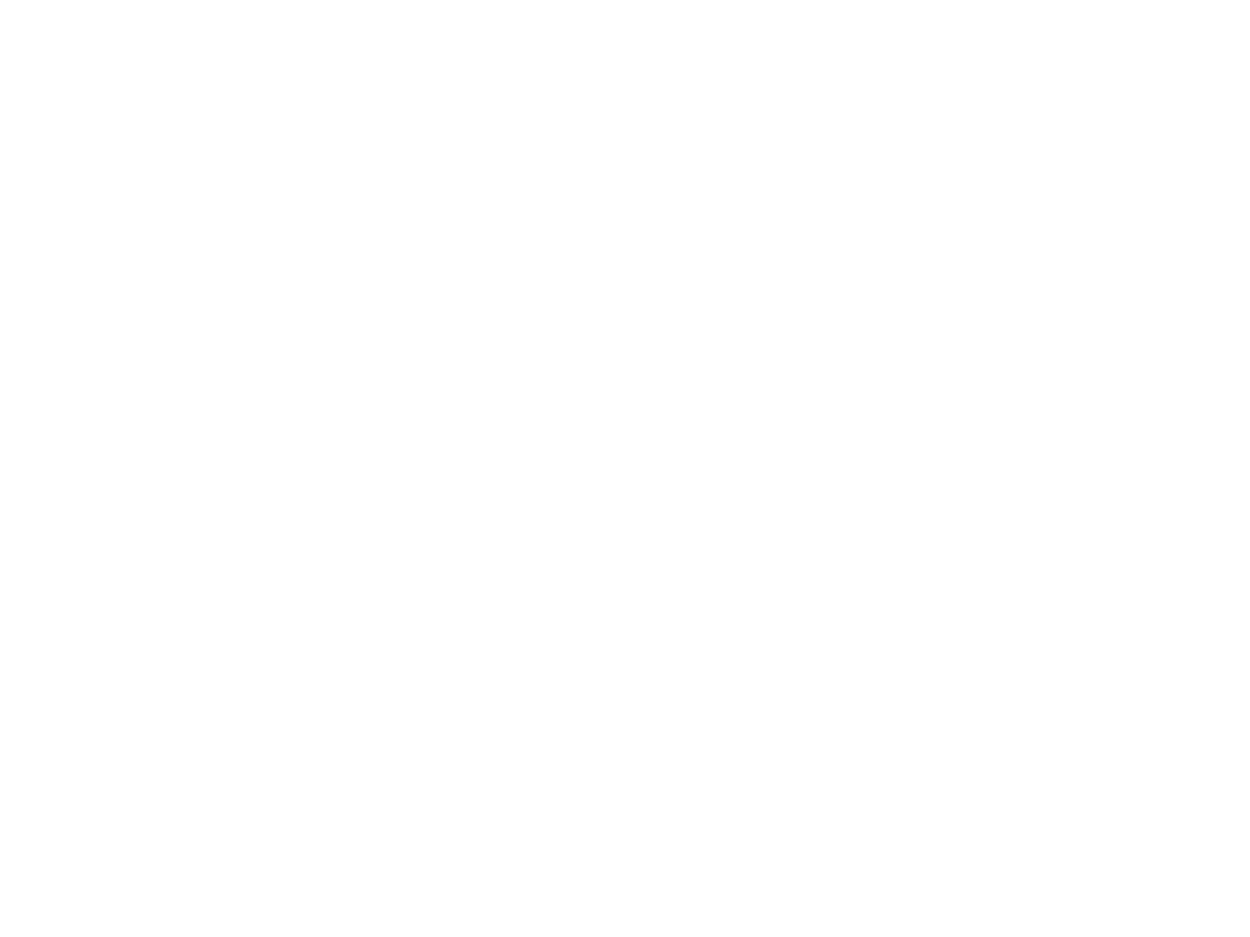

In [191]:
x = np.arange(1.6, 3, 0.5)
y = np.arange(1.6, 3, 0.5)
X, Y = np.meshgrid(x, y)
# print(np.meshgrid(x, y))
# print(type(X)) # array
Z1 = -4*X + 2*Y + 1
Z2 = (-3*X - Y + 1)/3
Z3 = (-2*X - 4*Y + 3)/5

fig = plt.figure()
ax1 = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax1)
ax1.plot_surface(X, Y, Z1, alpha = 0.5, color = 'red')
ax1.plot_surface(X, Y, Z2, alpha = 0.5, color = 'blue')
ax1.plot_surface(X, Y, Z3, alpha = 0.5, color = 'orange')
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

fig.set_figwidth(8) 
fig.set_figheight(6)

### 從圖形來看，此三平面兩兩交於一直線，且沒有共同交點，所以我的程式碼判斷此方程組無解是正確的。

## 3.無限多組解

###   $\begin{cases}2x-y-z=1\\x+y+2z=2 \;\;\;\;\;\;\;-→\\-7x+2y+z=-5\end{cases}  \left[\begin{matrix}2 & -1 & -1\\1 & 1 & 2\\-7 & 2 & 1\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}1\\2\\-5\end{matrix}\right]$

In [192]:
from sympy.abc import x, y, z
import sympy as sp

In [193]:
from IPython.display import display, Markdown

In [194]:
A = sp.Matrix([[2, -1, -1], 
               [1, 1, 2], 
               [-7, 2, 1]])
x_matrix = sp.Matrix([[x], 
               [y], 
               [z]])
b = sp.Matrix([[1], 
               [2], 
               [-5]])

a = '### $'+'A\;=' +  sp.latex(A) + ',\;' + 'x(matrix)\;=' + sp.latex(x_matrix) + ',\;' + 'b\;=' +  sp.latex(b) + '$'
display(Markdown(a))

### $A\;=\left[\begin{matrix}2 & -1 & -1\\1 & 1 & 2\\-7 & 2 & 1\end{matrix}\right],\;x(matrix)\;=\left[\begin{matrix}x\\y\\z\end{matrix}\right],\;b\;=\left[\begin{matrix}1\\2\\-5\end{matrix}\right]$

## 我的程式碼計算的結果

In [195]:
state, x = Cramer(A, b)
print(state)
x

無限多組解


''

### 下面為了驗證我的判斷，我在下面將該線性方程組的圖形畫出來，利用這些平面之間的幾何關係來驗證我的判斷是否正確。

In [196]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format  = 'svg'

<IPython.core.display.Javascript object>


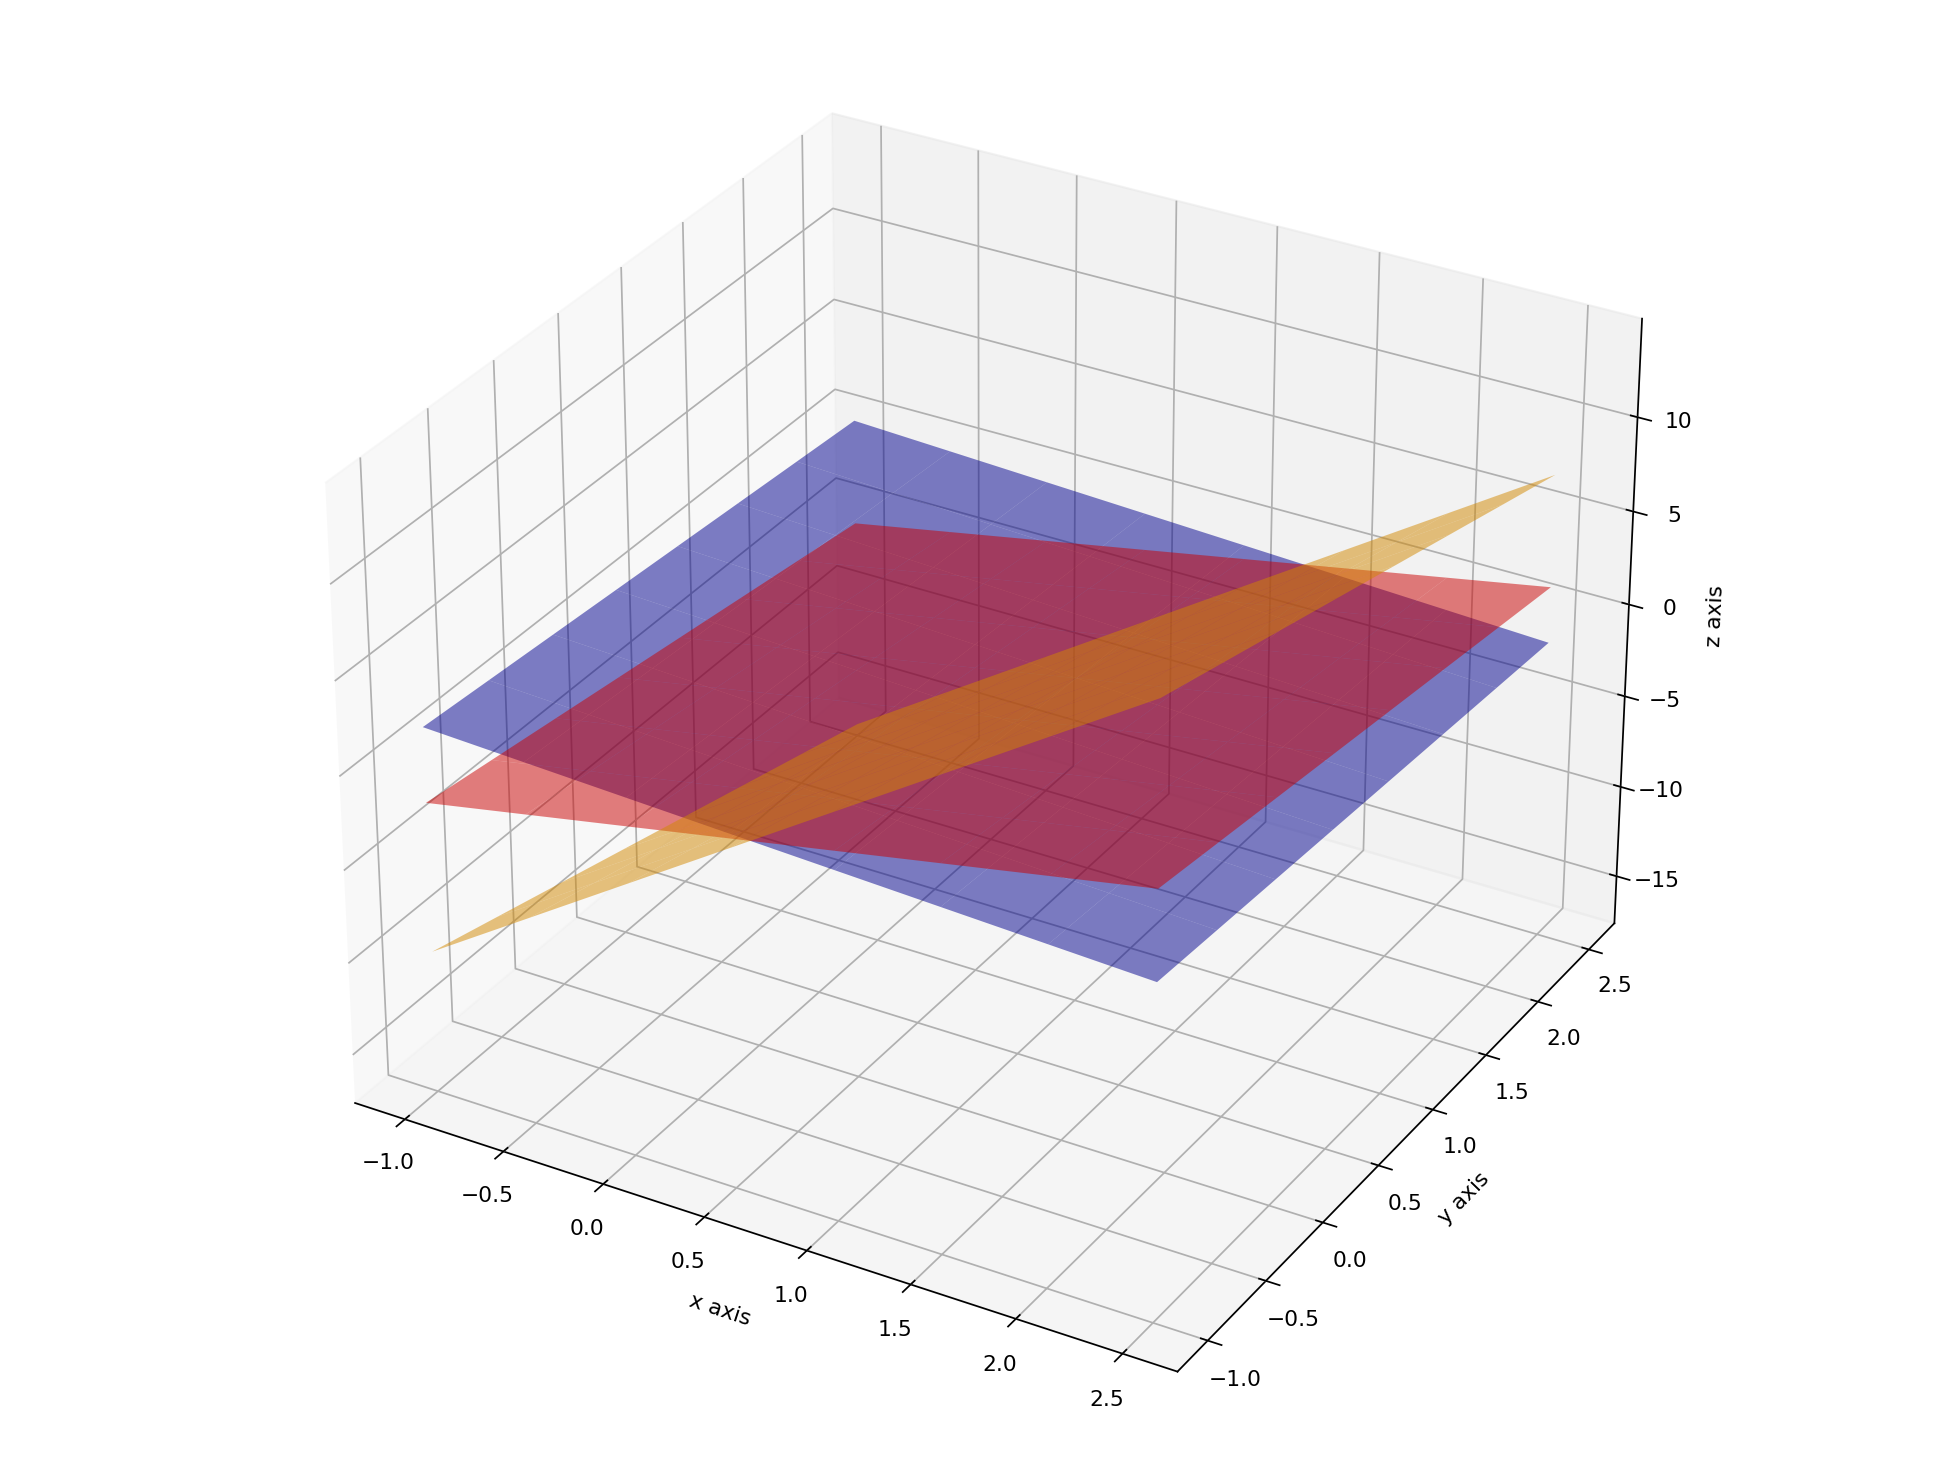

In [197]:
x = np.arange(-1, 3, 0.5)
y = np.arange(-1, 3, 0.5)
X, Y = np.meshgrid(x, y)
# print(np.meshgrid(x, y))
# print(type(X)) # array
Z1 = 2*X - Y -1
Z2 = (-X - Y + 2)/2
Z3 = 7*X - 2*Y - 5

fig = plt.figure()
ax1 = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax1)
ax1.plot_surface(X, Y, Z1, alpha = 0.5, color = 'red')
ax1.plot_surface(X, Y, Z2, alpha = 0.5, color = 'blue')
ax1.plot_surface(X, Y, Z3, alpha = 0.5, color = 'orange')
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

fig.set_figwidth(8) 
fig.set_figheight(6)

### 從圖形來看，此三平面共同交於一條直線，所以我的程式碼判斷出這個線性方程組為無線多組解是正確的。

## (2)高斯消去法

### 畢竟高斯消去法是$LU$分解重要的一環，而我又討論到線性方程組的求解，那就不能不提它了。其實在曾正男教授講解$LU$分解法前，他就有另外做了一個高斯消去法的教學影片，可見它的重要性。而教授同樣在影片最後面附上他所寫的程式碼，下面我同樣會對教授的程式碼進行修改。

### 我在先前測試的時候發現教授的程式碼有與$LU$分解的程式碼相似的問題，只要主對角線上很多$0$的時候就容易發生問題。其實教授也有提到，他寫的程式碼沒辦法解出所有的線性方程組。所以，我想說，既然教授都寫到這裡了，剩下的部分為什麼不直接完成呢?$\;$於是，我修改了教授的程式碼，使其能正確地求出解。

## [曾正男教授的高斯消去法教學影片連結](https://www.youtube.com/watch?v=HWNgsIRt_oM)

## <1> 教授寫的程式碼(有的註解是我自己加的，方便我記錄及理解)

In [198]:
import numpy as np

In [199]:
def Gauss_Elimination_1(A, b):
    m, n = A.shape # array(matrix).shape 可以看array(matrix)的形狀 ; m-->rows ; n-->columns
    R = np.mat(np.zeros([m, n+1])) 
    # R is the reduced row echelon form-->簡化後的列階梯形矩陣 ; n+1-->要在A矩陣中放入b, 即改成增廣矩陣
    R[:,:n] = A # [rows, columns] ; [:, :n]-->rows:all ; cloloumns:0 ~ (n-1)
    R[:,n] = b # [rows, columns] ; [:, n]-->rows:all ; cloloumn:n
    
    for i in range(m):
        # find maximal element in the column i
        maxEc = abs(R[i, i]) # maxEc為 A矩陣對角線上的值
        maxRow = i
        for k in range(i+1, m):
            if abs(R[k, i]) > maxEc:
                maxEc = abs(R[k, i])
                maxRow = k
                
        # swap maximum row with current row
        R[[i, maxRow], i:] = R[[maxRow, i], i:] 
        # [rows, columns] ; 第 i 列與第 maxRow 列互換 , 從該列的第 i 行開始(省略前面從第 0 行到第 (i-1)行的互換 ∵ 都是 0, 不用互換) 
        
        # make all rows below this one to 0
        for k in range(i+1, m):
            c = -float(R[k, i])/R[i, i] # float要加, 避免發生計算錯誤
            R[k, i:] = R[k, i:] + c*R[i, i:]
    # solve equation for an upper triangular matrix(the numbers in the lower triangular matrix are all solved to 0)
    x = np.mat(np.zeros([m, 1]))
    for i in range(m-1, -1, -1):
    # range(m-1, -1, -1)-->(m-1) ~ 0
        x[i] = float(R[i, -1])/R[i, i] # 最後一行(b矩陣) / 對角線上對應的變數係數 [一元一次方程式]
        # x[i]即是[i][0](只有一行不一定要寫) ; np.mat的形式可以用index去改變數值 
        # R[i][i]在矩陣的對角線上,不包含矩陣 b的部分, 只有矩陣 A
        
        # 事實上 , 上三角不會被換成 0 最終目標是解出未知數 , 
        # 所以從最右列的最下面那行的一元一次方程式開始往上代入 , 以求出上面的其他未知數
        for k in range(i-1, -1, -1):  
        # range(i-1, -1, -1)-->(i-1) ~ 0
            R[k, -1] -= R[k, i]*x[i] 
                     
    return x 

## <2> 我修改後的的程式碼

In [200]:
import numpy as np
import sympy as sp

In [201]:
def Gauss_Elimination_2(A, b):
    m, n = A.shape
    # Gauss Elimination(all contents below this line)
    R = sp.Matrix(np.zeros([m, n+1]))
    R[:, :n] = A
    R[:,  n] = b
    for k in R:
        k = sp.Rational(k).limit_denominator()
    
    for i in range(m):
        for v in range(i+1, m):
            if R[i, i] == 0:
                if R[v, i] != 0:
                    R = np.mat(R)
                    R[[v, i], :] = R[[i, v], :]
                    R = sp.Matrix(R)
                        
        for h in range(i+1, m):
            if R[i, i] == 0:
                continue
            c = R[h, i]/R[i, i]
            R[h, :] = R[h, :] - c*R[i, :]
    x = sp.zeros(m, 1) 
    for z in range(m-1, -1, -1):
    # (m-1) ~ 0; index = (-1) --> the last one
        x[z] = R[z, -1] / R[z, z]
        for y in range(z-1, -1, -1):
            R[y, -1] -= R[y, z] * x[z] 
        # 倒車往上消去未知數(先把A矩陣在主對角線下的元素全部消成0, 
        # 然後解好最下面的一元方程式, 往上代入二元方程式, 三元方程式, ...
    

        
    return x

### 下面我用和上面測試「恰有一解」時，一模一樣的方程組，比較我和教授的程式碼計算出來的答案有什麼不同

###   $\begin{cases}85x+69y-34z=120\\69x-85y+47z=10 \;\;\;--→\\23x-200y-21z=-23\end{cases} \; \left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

In [202]:
from sympy.abc import x, y, z

In [203]:
from IPython.display import display, Markdown

In [204]:
A = sp.Matrix([[85, 69, -34], 
               [69, -85, 47], 
               [23, -200, -21]])
x_matrix = sp.Matrix([[x],
                      [y], 
                      [z]])
b = sp.Matrix([[120], 
               [10], 
               [-23]])

a = '### $'+'A\;=' +  sp.latex(A) + ',\;' + 'x(matrix)\;=' + sp.latex(x_matrix) + ',\;' + 'b\;=' +  sp.latex(b) + '$'
display(Markdown(a))

### $A\;=\left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right],\;x(matrix)\;=\left[\begin{matrix}x\\y\\z\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

## 教授的程式碼計算的結果(為了清楚表示數學式，我將教授輸出的$x$矩陣從$np.mat( )$的形式切換成$sp.Matrix( )$的形式)

In [205]:
x1 = Gauss_Elimination_1(A, b)
x1 = sp.Matrix(x1)
a1 = '### $'+'x_1\;=' + sp.latex(x1) + ',\;' + 'Ax_1\;=' 
a2 = sp.latex(A*x1) + ',\;' + 'b\;=' + sp.latex(b) + '\;→' + 'Ax_1 ≠ b '+'$'
a3 = a1 + a2
display(Markdown(a3))

### $x_1\;=\left[\begin{matrix}0.927060093912076\\0.287569247885342\\-0.628165115099557\end{matrix}\right],\;Ax_1\;=\left[\begin{matrix}120.0\\9.99999999999999\\-23.0\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]\;→Ax_1 ≠ b $

## 我的程式碼計算的結果(高斯消去法, 此處我修改後的程式碼)

In [206]:
x2 = Gauss_Elimination_2(A, b)
a1 = '### $'+'x_2\;=' + sp.latex(x2) + ',\;' + 'Ax_2\;=' 
a2 = sp.latex(A*x2) + ',\;' + 'b\;=' + sp.latex(b) + '→\;' + 'Ax_2 = b  (成立)'+'$'
a3 = a1 + a2
display(Markdown(a3))

### $x_2\;=\left[\begin{matrix}\frac{1416571}{1528025}\\\frac{439413}{1528025}\\- \frac{959852}{1528025}\end{matrix}\right],\;Ax_2\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]→\;Ax_2 = b  (成立)$

## 我的程式碼計算的結果(在1.克拉瑪公式那裡寫的程式碼)

In [207]:
state, x3 = Cramer(A, b)
print(state)
a1 = '### $'+'x_3\;=' + sp.latex(x3) + ',\;' + 'Ax_3\;=' 
a2 = sp.latex(A*x3) + ',\;' + 'b\;=' + sp.latex(b) + '→\;' + 'Ax_3 = b  (成立)'+'$'
a3 = a1 + a2
display(Markdown(a3))

恰有一解


### $x_3\;=\left[\begin{matrix}\frac{1416571}{1528025}\\\frac{439413}{1528025}\\- \frac{959852}{1528025}\end{matrix}\right],\;Ax_3\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]→\;Ax_3 = b  (成立)$

### ↑$x_2 = x_3$，加上$x_3$這個答案在上面已經被驗證為正確的，所以我的程式碼計算出的$x_2$也是正確的。

### 由上可知，儘管教授的程式碼在計算時沒有出現差錯，一樣能計算出答案。不過，因為每個解皆是非常複雜的小數，若用$「float」$的小數形式來計算，則$Python$在顯示小數的數值時，小數末幾位可能產生偏差，進而導致$A$矩陣與$x_1$矩陣相乘後，與$b$矩陣間有極小的誤差。而我主要用和上面，改良$LU$分解在計算時產生的誤差一樣的想法進行修改: 「用分數取代小數進行計算」，這樣可使解的各個數值皆為標準無偏差，也能使$Ax=b$的等式成立。

## (3)矩陣計算直接求解

### 如果說要偷懶一下，省去高斯消去法的計算，事實上只要確定$A$矩陣為可逆矩陣$(det(A)≠0)$，在$Ax=b$的兩邊同乘$A^{-1}$，然後就可得到:$x = A^{-1}b$，$「x$矩陣」中的元素即為解。下面我用和上面測試「恰有一解」時，一模一樣的方程組，看看使用矩陣計算求出來的解和我在上面算出來的正確答案是否相同。

###   $\begin{cases}85x+69y-34z=120\\69x-85y+47z=10 \;\;\;--→\\23x-200y-21z=-23\end{cases} \; \left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right]  \left[\begin{matrix}x\\y\\z\end{matrix}\right]  =  \left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

In [208]:
import numpy as np
import sympy as sp

In [209]:
from IPython.display import display, Markdown

In [210]:
A = sp.Matrix([[85, 69, -34], 
               [69, -85, 47], 
               [23, -200, -21]])
x_matrix = sp.Matrix([[x],
                      [y], 
                      [z]])
b = sp.Matrix([[120], 
               [10], 
               [-23]])

a = '### $'+'A\;=' +  sp.latex(A) + ',\;' + 'x(matrix)\;=' + sp.latex(x_matrix) + ',\;' + 'b\;=' +  sp.latex(b) + '$'
display(Markdown(a))

### $A\;=\left[\begin{matrix}85 & 69 & -34\\69 & -85 & 47\\23 & -200 & -21\end{matrix}\right],\;x(matrix)\;=\left[\begin{matrix}x\\y\\z\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]$

## 我的程式碼計算的結果(矩陣直接計算)

In [211]:
A1 = A.inv()
x4 = A1 * b
a1 = '### $'+'x_4\;=' + sp.latex(x3) + ',\;' + 'Ax_4\;=' 
a2 = sp.latex(A*x4) + ',\;' + 'b\;=' + sp.latex(b) + '→\;' + 'Ax_4 = b  (成立)'+'$'
a3 = a1 + a2
display(Markdown(a3))

### $x_4\;=\left[\begin{matrix}\frac{1416571}{1528025}\\\frac{439413}{1528025}\\- \frac{959852}{1528025}\end{matrix}\right],\;Ax_4\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]→\;Ax_4 = b  (成立)$

## 我的程式碼計算的結果(在1.克拉瑪公式那裡寫的程式碼)

In [212]:
state, x5 = Cramer(A, b)
print(state)
a1 = '### $'+'x_5\;=' + sp.latex(x5) + ',\;' + 'Ax_5\;=' 
a2 = sp.latex(A*x5) + ',\;' + 'b\;=' + sp.latex(b) + '→\;' + 'Ax_5 = b  (成立)'+'$'
a3 = a1 + a2
display(Markdown(a3))

恰有一解


### $x_5\;=\left[\begin{matrix}\frac{1416571}{1528025}\\\frac{439413}{1528025}\\- \frac{959852}{1528025}\end{matrix}\right],\;Ax_5\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]→\;Ax_5 = b  (成立)$

## 我的程式碼計算的結果(在2.高斯消去法那裡寫的程式碼)

In [213]:
x6 = Gauss_Elimination_2(A, b)
a1 = '### $'+'x_6\;=' + sp.latex(x6) + ',\;' + 'Ax_6\;=' 
a2 = sp.latex(A*x6) + ',\;' + 'b\;=' + sp.latex(b) + '→\;' + 'Ax_6 = b  (成立)'+'$'
a3 = a1 + a2
display(Markdown(a3))

### $x_6\;=\left[\begin{matrix}\frac{1416571}{1528025}\\\frac{439413}{1528025}\\- \frac{959852}{1528025}\end{matrix}\right],\;Ax_6\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right],\;b\;=\left[\begin{matrix}120\\10\\-23\end{matrix}\right]→\;Ax_6 = b  (成立)$

### $↑x_4 = x_5 = x_6$，且由上可知，運用矩陣計算求出來的$x_4$與我利用克拉瑪公式所得的$x_5$及高斯消去法求得的$x_6$相同，且$x_5$和$x_6$在上面已經被驗證過是正確的，所以運用矩陣計算求出來的$x_4$也是正確的。